Data Visualisation for Exploratory Data Analysis. comparing categories, finding relations between variables, exploring distributions and visualising timeseries data

In [3]:
#importing packages
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime


In [4]:
#uber dataset ride sharing analytics 
dataset_path = '/Users/iqra/Desktop/Sharefolder/Master_DataScience/1_MS_DataScience/Assignments/archive/ncr_ride_bookings.csv'
df = pd.read_csv(dataset_path)

In [5]:
print(df.shape)
df.head()

(150000, 21)


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [ ]:

# Ensure Date and Time are strings
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)

# Combine Date and Time into a single datetime column
df['pickup_datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

# Check if parsing worked
print(df['pickup_datetime'].head())

/var/folders/3v/77sqws9d77b8wxc2bx9nnzt80000gn/T/ipykernel_86246/3106201514.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['pickup_datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


0   2024-03-23 12:29:38-01:00
1   2024-11-29 18:01:39-01:00
2   2024-08-23 08:56:10-01:00
3   2024-10-21 17:17:25-01:00
4   2024-09-16 22:08:00-01:00
Name: pickup_datetime, dtype: datetime64[ns, UTC-01:00]


In [7]:
#Data preparation 
df['Cancelled Rides by Customer'].value_counts()

Cancelled Rides by Customer
1.0    10500
Name: count, dtype: int64

In [8]:
df['Reason for cancelling by Customer'].value_counts()

Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64

In [9]:
df['Driver Cancellation Reason'].value_counts()

Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: count, dtype: int64

In [10]:
# Filling the missing data  with values
df['Incomplete Rides Reason'] = df['Incomplete Rides Reason'].fillna('Reason Unkown')
df['Driver Cancellation Reason'] = df['Driver Cancellation Reason'].fillna('Reason Unkown')
df['Reason for cancelling by Customer'] = df['Reason for cancelling by Customer'].fillna('Reason Unkown')
df['Incomplete Rides'] = df['Incomplete Rides'].fillna(0) # 0 Indicates completed Rides
df['Cancelled Rides by Customer'] = df['Cancelled Rides by Customer'].fillna(0) # 0 Indicates non cancelled Rides
df['Cancelled Rides by Driver'] = df['Cancelled Rides by Driver'].fillna(0) # 0 Indicates non cancelled Rides

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        150000 non-null  float64
 11  Reason for cancelling by Customer  1500

In [12]:
df['Driver Ratings'].unique()

array([nan, 4.9, 4.6, 4.1, 4. , 4.4, 4.2, 4.7, 3.8, 5. , 3.7, 3.1, 4.5,
       3.9, 4.3, 3.3, 3.2, 4.8, 3.6, 3.5, 3.4, 3. ])

In [13]:
from sklearn.impute import SimpleImputer

rat_cols = ['Driver Ratings', 'Customer Rating']
imputer = SimpleImputer(strategy='mean')
df[rat_cols] = imputer.fit_transform(df[rat_cols])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        150000 non-null  float64
 11  Reason for cancelling by Customer  1500

In [38]:
df['Date'] 

0        2024-03-23
1        2024-11-29
2        2024-08-23
3        2024-10-21
4        2024-09-16
            ...    
149995   2024-11-11
149996   2024-11-24
149997   2024-09-18
149998   2024-10-05
149999   2024-03-10
Name: Date, Length: 150000, dtype: datetime64[ns]

In [16]:
#convert time and date types to timedate 
from datetime import datetime, date, time
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d') 



In [125]:
#Corelation Matrix 
numeric_columns = [
    'Avg VTAT', 'Avg CTAT', 
    'Booking Value', 'Ride Distance', 
    'Driver Ratings', 'Customer Rating'
]
numeric_columns = df[numeric_columns].dropna()


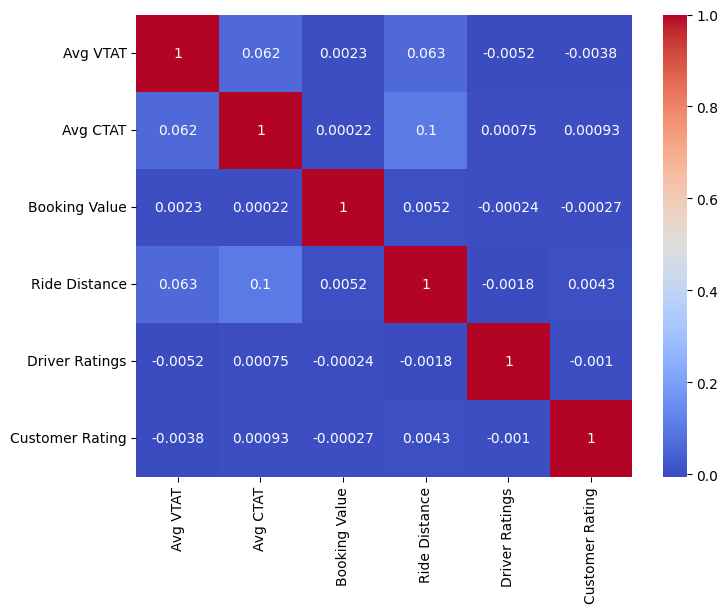

In [126]:
corr_matrix =  numeric_columns.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot=True)
plt.show()


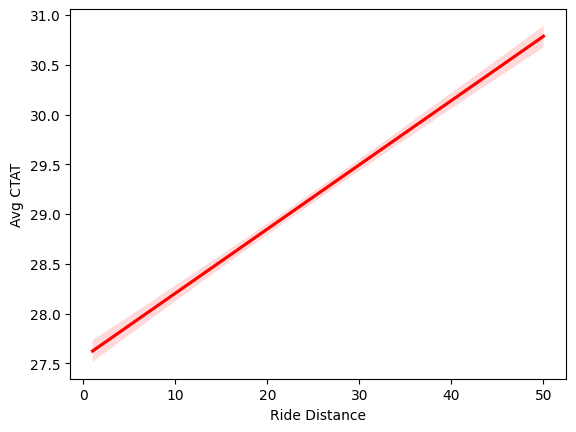

In [ ]:
sns.regplot(data=df, x="Ride Distance", y="Avg CTAT", scatter=False, line_kws={"color":"red"})
plt.show()

In [44]:
df['Month'] = df['Date'].dt.month 

In [68]:
df['Month_name'] = df['Date'].dt.month_name()

In [71]:
months_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"]

In [72]:
df['Month_name'] = pd.Categorical(
    df['Month_name'], categories=months_order, ordered=True
)

In [73]:
print(df['Month_name'].unique())

['March', 'November', 'August', 'October', 'September', ..., 'December', 'July', 'May', 'January', 'April']
Length: 12
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']


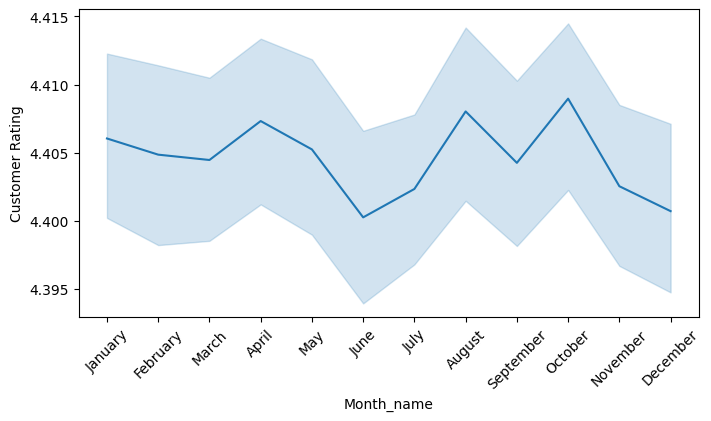

In [75]:
#Incomplete rides over the time 


plt.figure(figsize=(8,4))
sns.lineplot(data=df, x='Month_name', y='Customer Rating')

plt.xticks(rotation=45)  # rotate labels so they don’t overlap
plt.show()


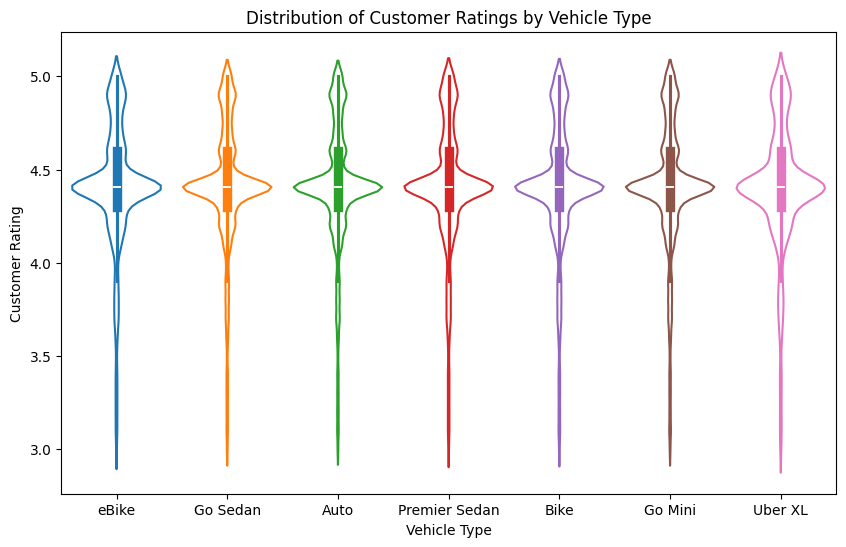

In [84]:
#Customer Rating distribution by Vehicle Type
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.violinplot(x="Vehicle Type", y="Customer Rating", data=df, hue = 'Vehicle Type', fill= False)
plt.title("Distribution of Customer Ratings by Vehicle Type")
plt.show()


The explanation is mostly accurate: this violin plot demonstrates the relationship between customer ratings and vehicle types, showing that ratings are generally high for all categories and indicating strong customer satisfaction. The box plot components within the violins do highlight that the average (median) rating is about 4.3 across all types.

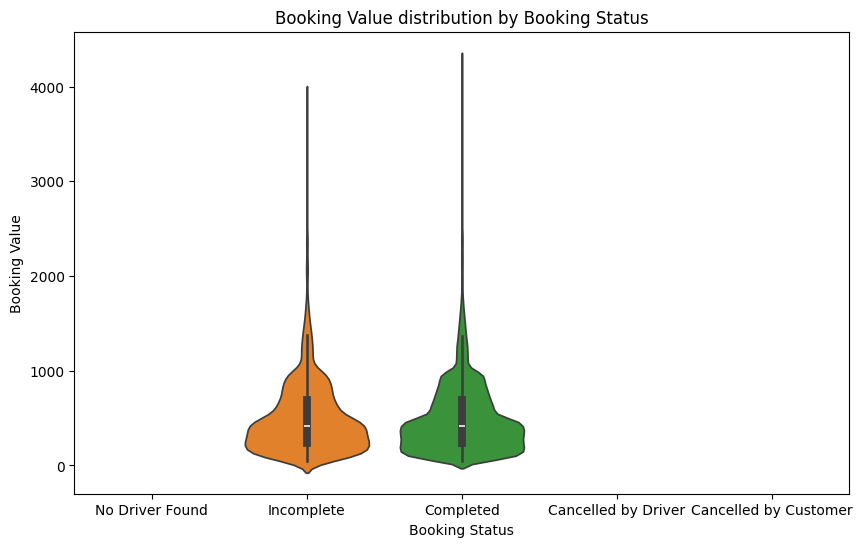

In [94]:
#Booking Value distribution by Cancellation Status:
plt.figure(figsize=(10,6))
sns.violinplot(x="Booking Status", y="Booking Value", data=df, hue = 'Booking Status')
plt.title("Booking Value distribution by Booking Status")
plt.show()



/var/folders/3v/77sqws9d77b8wxc2bx9nnzt80000gn/T/ipykernel_86246/2330300036.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='viridis')


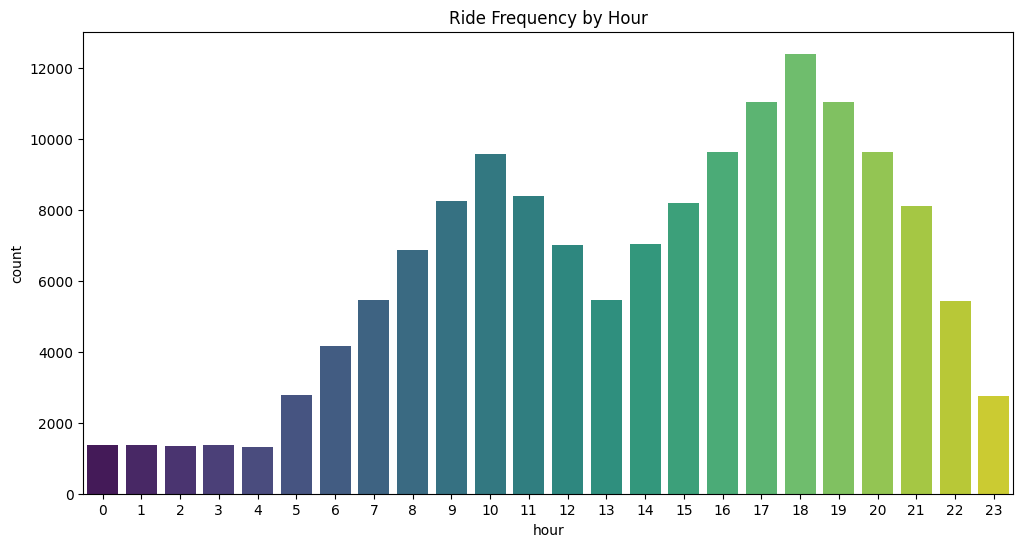

In [93]:

# Extract time features
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.day_name()
df['month'] = df['pickup_datetime'].dt.month

# Ride frequency by hour
plt.figure(figsize=(12,6))
sns.countplot(x='hour', data=df, palette='viridis')
plt.title('Ride Frequency by Hour')
plt.show()

/var/folders/3v/77sqws9d77b8wxc2bx9nnzt80000gn/T/ipykernel_24149/1446460120.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vehicle Type', y='Incomplete Rides', data=df, estimator=sum, palette='magma')


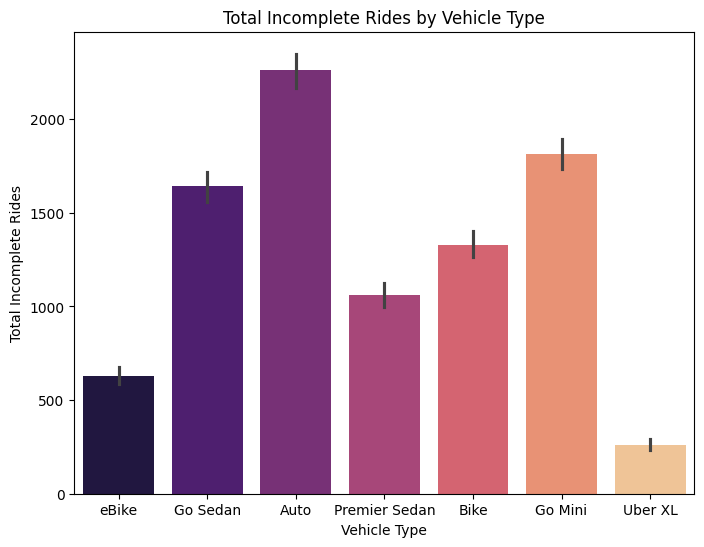

In [133]:
plt.figure(figsize=(8,6))
sns.barplot(x='Vehicle Type', y='Incomplete Rides', data=df, estimator=sum, palette='magma')
plt.title('Total Incomplete Rides by Vehicle Type')
plt.ylabel('Total Incomplete Rides')
plt.show()

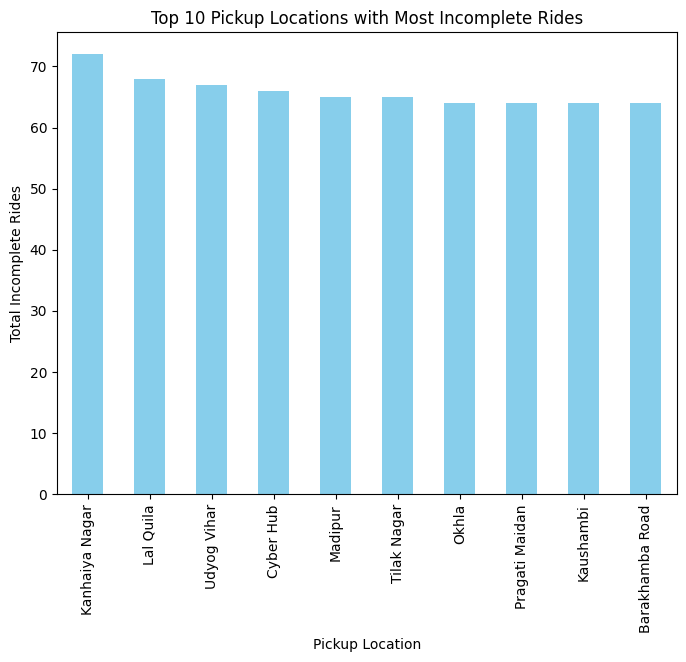

In [134]:
#Incomplete Rides by Pickup Location
top_pickup_locations = df.groupby('Pickup Location')['Incomplete Rides'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,6))
top_pickup_locations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Pickup Locations with Most Incomplete Rides')
plt.ylabel('Total Incomplete Rides')
plt.show()

Text(0.5, 1.0, 'Incomplete Rides vs Avg VTAT')

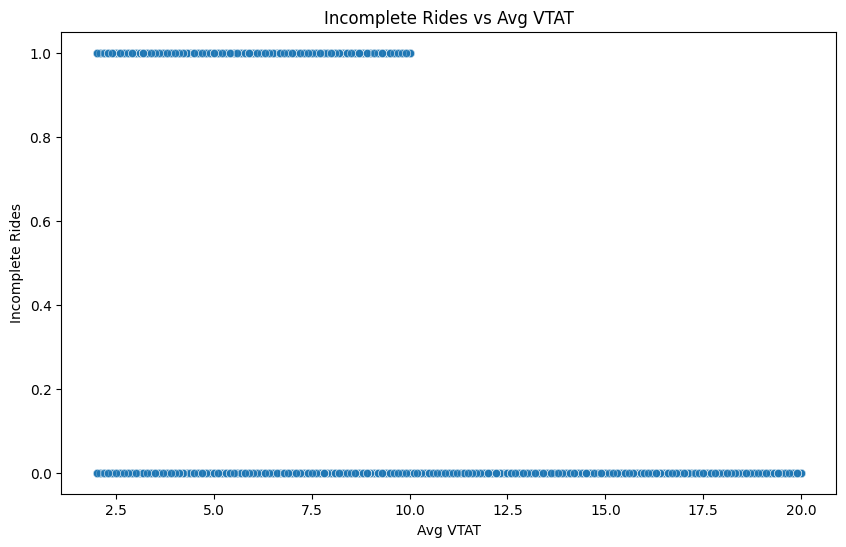

In [136]:
#Incomplete Rides vs Avg VTAT / CTAT
plt.figure(figsize=(10,6))
sns.scatterplot(x='Avg VTAT', y='Incomplete Rides', data=df, alpha=0.6)
plt.title('Incomplete Rides vs Avg VTAT')

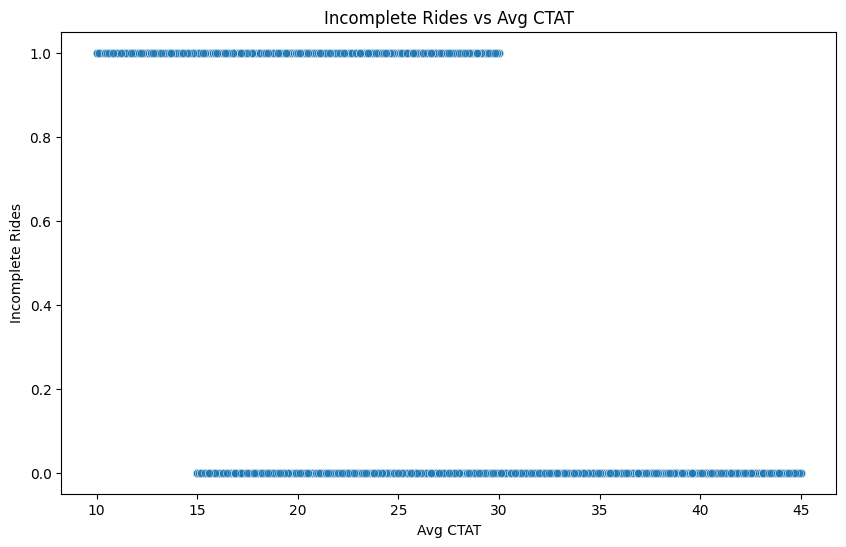

In [137]:
#Incomplete Rides vs Avg CTAT
plt.figure(figsize=(10,6))
sns.scatterplot(x='Avg CTAT', y='Incomplete Rides', data=df, alpha=0.6)
plt.title('Incomplete Rides vs Avg CTAT')
plt.show()

/var/folders/3v/77sqws9d77b8wxc2bx9nnzt80000gn/T/ipykernel_24149/1644443768.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reasons.index, y=top_reasons.values, palette='coolwarm')


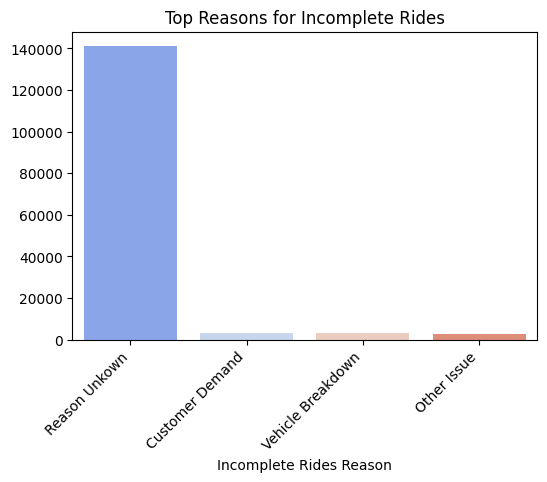

In [140]:
#Reasons for Incomplete Rides

top_reasons = df['Incomplete Rides Reason'].value_counts().head(10)
plt.figure(figsize=(6,4))
sns.barplot(x=top_reasons.index, y=top_reasons.values, palette='coolwarm')
plt.title('Top Reasons for Incomplete Rides')
plt.xticks(rotation=45, ha='right')
plt.show()